# Executive Summary
## Background:
We are presented with statistics of Seattle's crime information. One dataset provided is the crime rate for 1996 to 2007, and the other is from 2008 to 2014
## What we hope to find:
* Overall crime rate difference between 1996-2007 and 2008-2014
* Rate of overall crime increase from 1996 to the present
* Rate of crime increase for each individual crime from 1996 to 2014
* Seasonal trends in crime for 2008 to 2014
## What we found:
* There wasn't a major year-by-year trend
* For both violent and theft-related crimes, there was a major drop in number of crimes (37% and 46% respectively) between 2005 and 2006
    * Crime was significantly higher in 1996 to 2005, then suddenly dropped in 2006 and stayed low ever since.
* There was approximately fifteen times more theft related crimes to violent crimes each given year
    * 14.8x more theft crimes than violent crimes (Median)
    * 15.0x more theft crimes than violent crimes (average)
* Between 1996 and 2005 (inclusive), the average number of crimes was ~99,106 crimes
    * Between 1996 and 2005 (inclusive), the average number of theft-related crimes was ~92,375 crimes
    * Between 1996 and 2005 (inclusive), the average number of violent crimes was ~6,731 crimes
* Between 2006 and 2014 (inclusive), the average of number crimes was ~34,357 crimes
    * Between 2006 and 2014 (inclusive), the average number of theft-related crimes was ~32384 crimes
    * Between 2006 and 2014 (inclusive), the average number of violent crimes was ~1,972 crimes
* For 2008 to 2014, there was a slight increase in crime during the middle of each year (i.e. summer time)
## Sociological Hypothesis:
My major conclusion after viewing this dataset is that, assuming no data was lost after 2005, a major law(s) was implemented that impacted crime rates (either directly or indirectly) in between 2005 and 2006. Either a law that deterred criminals or helped the poor and mentally-unstable.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import copy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/seattle-crime-stats/seattle-crime-stats-by-1990-census-tract-1996-2007.csv
/kaggle/input/seattle-crime-stats/socrata_metadata_seattle-crime-stats-by-1990-census-tract-1996-2007.json
/kaggle/input/seattle-crime-stats/socrata_metadata_seattle-crime-stats-by-police-precinct-2008-present.json
/kaggle/input/seattle-crime-stats/seattle-crime-stats-by-police-precinct-2008-present.csv


In [2]:
seattle_90_07_df = pd.read_csv('/kaggle/input/seattle-crime-stats/seattle-crime-stats-by-1990-census-tract-1996-2007.csv')
seattle_08_now_df = pd.read_csv('/kaggle/input/seattle-crime-stats/seattle-crime-stats-by-police-precinct-2008-present.csv')

In [3]:
print(seattle_90_07_df)

       Report_Year  Census_Tract_1990               Crime_Type  \
0             1996                1.0       Aggravated Assault   
1             1996                1.0                 Homicide   
2             1996                1.0  NonResidential Burglary   
3             1996                1.0    Property Crimes Total   
4             1996                1.0                     Rape   
...            ...                ...                      ...   
14263         2007               99.0                     Rape   
14264         2007               99.0     Residential Burglary   
14265         2007               99.0                  Robbery   
14266         2007               99.0                    Theft   
14267         2007               99.0            Vehicle Theft   

       Report_Year_Total  
0                     11  
1                      0  
2                     41  
3                    430  
4                      2  
...                  ...  
14263             

In [4]:
print(seattle_08_now_df)

      Police Beat           CRIME_TYPE  \
0              R2                 Rape   
1              K2              Assault   
2              M2             Homicide   
3              C3              Robbery   
4              E2  Motor Vehicle Theft   
...           ...                  ...   
27120          B2             Homicide   
27121          B1             Burglary   
27122          B1  Motor Vehicle Theft   
27123          B1        Larceny-Theft   
27124          B1              Robbery   

                                       CRIME_DESCRIPTION  STAT_VALUE  \
0                                                   Rape           1   
1                                                Assault           5   
2                                               Homicide           1   
3                                                Robbery           2   
4      Vehicle Theft is theft of a car, truck, motorc...           7   
...                                                  ...       

In [5]:
print(np.unique(seattle_90_07_df['Crime_Type'].values))
print(np.unique(seattle_08_now_df['CRIME_TYPE'].values))

['Aggravated Assault' 'Homicide' 'NonResidential Burglary'
 'Property Crimes Total' 'Rape' 'Residential Burglary' 'Robbery' 'Theft'
 'Vehicle Theft' 'Violent Crimes Total']
['Assault' 'Burglary' 'Homicide' 'Larceny-Theft' 'Motor Vehicle Theft'
 'Rape' 'Robbery']


In [6]:
seattle_90_07_df[
    seattle_90_07_df['Crime_Type'] == 'Violent Crimes Total'
]

,Report_Year,Census_Tract_1990,Crime_Type,Report_Year_Total
9,1996,1.0,Violent Crimes Total,15
19,1996,10.0,Violent Crimes Total,13
29,1996,100.0,Violent Crimes Total,82
39,1996,101.0,Violent Crimes Total,62
49,1996,102.0,Violent Crimes Total,37
59,1996,103.0,Violent Crimes Total,109
69,1996,104.0,Violent Crimes Total,59
79,1996,105.0,Violent Crimes Total,27
89,1996,106.0,Violent Crimes Total,28
99,1996,107.0,Violent Crimes Total,90


In [7]:
# The violent crimes total category is very vague.
# I was unsure if this was violent crimes not included in the
# existing violent crime categories, or if it is a summation
# of the existing violent crime categories. To handle this
# ambiguity, I needed to bundle this category with another category,
# since I was unsure if this is a real category by itself.
# Additionally, this lead to not being sure which category to bundle it with,
# so I simply bundled all violent categories together, and all theft crimes together.
all_categories_binary_mapping = {
    'Aggravated Assault': 0,
    'Homicide': 0,
    'NonResidential Burglary': 1,
    'Property Crimes Total': 1,
    'Rape': 0,
    'Residential Burglary': 1,
    'Robbery': 1,
    'Theft': 1,
    'Vehicle Theft': 1,
    'Violent Crimes Total': 0,
    #
    'Assault': 0,
    'Rape': 0,
    'Homicide': 0,
    'Burglary': 1,
    'Larceny-Theft': 1,
    'Motor Vehicle Theft': 1,
    'Robbery': 1
}

In [8]:
def create_embedding(rows_for_year):
    embedding = [0, 0]
    for row in zip(rows_for_year['Crime_Type'], rows_for_year['Report_Year_Total']):
        embedding[
            all_categories_binary_mapping[row[0]]
        ] += row[1]
    return embedding

In [9]:
seattle_90_07_embedding_df = seattle_90_07_df.groupby('Report_Year').apply(create_embedding)
seattle_90_07_embedding_df

Report_Year
1996    [6992, 103784]
1997    [7822, 104939]
1998     [7113, 98124]
1999     [6595, 92504]
2000     [6924, 83246]
2001     [6581, 85265]
2002     [6496, 86135]
2003     [6285, 94020]
2004     [5948, 87182]
2005     [6554, 88554]
2006     [2449, 40985]
2007     [2122, 35437]
dtype: object

In [12]:
def create_embedding_2(rows_for_year):
    embedding = [0, 0]
    for row in zip(rows_for_year['CRIME_TYPE'], rows_for_year['STAT_VALUE']):
        embedding[
            all_categories_binary_mapping[row[0]]
        ] += row[1]
    return embedding

In [14]:
seattle_08_now_embedding_df = copy.deepcopy(seattle_08_now_df)
seattle_08_now_embedding_df['REPORT_DATE'] = seattle_08_now_embedding_df['REPORT_DATE'].apply(
    lambda x: x.split("-")[0]
)
seattle_08_now_embedding_df = seattle_08_now_embedding_df.groupby('REPORT_DATE').apply(
    create_embedding_2
)
seattle_08_now_embedding_df

REPORT_DATE
2008    [1829, 34274]
2009    [2034, 36745]
2010    [2034, 34411]
2011    [2211, 32968]
2012    [2308, 32008]
2013    [2056, 32916]
2014     [712, 11716]
dtype: object

In [30]:
seattle_df = pd.concat([seattle_90_07_embedding_df, seattle_08_now_embedding_df])
seattle_df

1996    [6992, 103784]
1997    [7822, 104939]
1998     [7113, 98124]
1999     [6595, 92504]
2000     [6924, 83246]
2001     [6581, 85265]
2002     [6496, 86135]
2003     [6285, 94020]
2004     [5948, 87182]
2005     [6554, 88554]
2006     [2449, 40985]
2007     [2122, 35437]
2008     [1829, 34274]
2009     [2034, 36745]
2010     [2034, 34411]
2011     [2211, 32968]
2012     [2308, 32008]
2013     [2056, 32916]
2014      [712, 11716]
dtype: object

In [31]:
seattle_df = seattle_df.to_frame()
seattle_df['violent'] = seattle_df[0].apply(lambda x: x[0])
seattle_df['theft'] = seattle_df[0].apply(lambda x: x[1])
seattle_df = seattle_df.drop(columns=[0])
seattle_df

,violent,theft
1996,6992,103784
1997,7822,104939
1998,7113,98124
1999,6595,92504
2000,6924,83246
2001,6581,85265
2002,6496,86135
2003,6285,94020
2004,5948,87182
2005,6554,88554


In [32]:
seattle_df.describe()

,violent,theft
count,19.000000,19.000000
mean,4477.105263,63958.578947
std,2490.752717,31731.120014
min,712.000000,11716.000000
25%,2089.000000,34342.500000
50%,5948.000000,83246.000000
75%,6588.000000,90529.000000
max,7822.000000,104939.000000


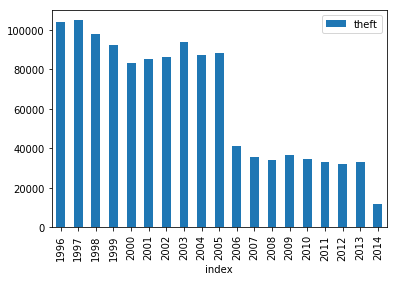

In [34]:
seattle_df.reset_index().plot.bar(y='theft', x=0)

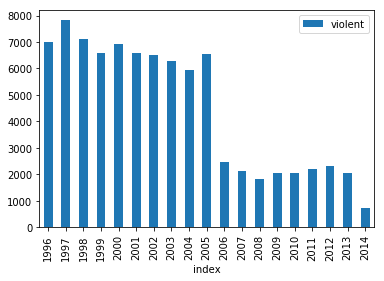

In [35]:
seattle_df.reset_index().plot.bar(y='violent', x=0)

In [77]:
# Between 1996 and 2005 (inclusive), the average number of crimes was 99,106 crimes
np.average([x[0] + x[1] for x in seattle_df.loc[[x for x in range(1996,2006)], :].values])

99106.3

In [78]:
# Between 2006 and 2014 (inclusive), the average of number crimes was 34,357 crimes
np.average([x[0] + x[1] for x in seattle_df.loc[
    [str(x) if int(x) > 2007 else x for x in range(2006,2015)
], :].values])

34357.22222222222

In [72]:
# Between 1996 and 2005 (inclusive), the average number of theft-related crimes was 92,375 crimes
np.average(seattle_df.loc[[x for x in range(1996,2006)], :]['theft'].values)

92375.3

In [74]:
# Between 1996 and 2005 (inclusive), the average number of violent crimes was 6,731 crimes
np.average(seattle_df.loc[[x for x in range(1996,2006)], :]['violent'].values)

6731.0

In [75]:
# Between 2006 and 2014 (inclusive), the average number of theft-related crimes was 32,384 crimes
np.average(seattle_df.loc[
    [str(x) if int(x) > 2007 else x for x in range(2006,2015)
], :]['theft'].values)

32384.444444444445

In [76]:
# Between 2006 and 2014 (inclusive), the average number of violent crimes was 1,972 crimes
np.average(seattle_df.loc[
    [str(x) if int(x) > 2007 else x for x in range(2006,2015)
], :]['violent'].values)

1972.7777777777778

In [113]:
# Percent of crime decrease from 2005 to 2006
seattle_df.loc[[2006]].values / seattle_df.loc[[2005]].values * 100

array([[37.36649374, 46.2824943 ]])

In [45]:
# Average of 15x more theft than violent crimes
np.average(seattle_df['theft'] / seattle_df['violent'])

15.044694303867663

In [46]:
# Median of 14.8x more theft than violent crimes
np.median(seattle_df['theft'] / seattle_df['violent'])

14.84324942791762

In [48]:
seattle_08_now_monthly_embedding_df = copy.deepcopy(seattle_08_now_df)
seattle_08_now_monthly_embedding_df['REPORT_DATE'] = seattle_08_now_monthly_embedding_df['REPORT_DATE'].apply(
    lambda x: x.split("-")[0] + "-" +x.split("-")[1]
)
seattle_08_now_monthly_embedding_df = seattle_08_now_monthly_embedding_df.groupby('REPORT_DATE').apply(
    create_embedding_2
)
seattle_08_now_monthly_embedding_df

REPORT_DATE
2008-01    [142, 2570]
2008-02    [139, 2434]
2008-03    [125, 2678]
2008-04    [130, 2692]
2008-05    [153, 2911]
              ...     
2013-12    [169, 3180]
2014-01    [189, 3177]
2014-02    [160, 2386]
2014-03    [168, 3118]
2014-04    [195, 3035]
Length: 76, dtype: object

In [81]:
seattle_monthly_df = seattle_08_now_monthly_embedding_df.to_frame()
seattle_monthly_df['violent'] = seattle_monthly_df[0].apply(lambda x: x[0])
seattle_monthly_df['theft'] = seattle_monthly_df[0].apply(lambda x: x[1])
seattle_monthly_df = seattle_monthly_df.drop(columns=[0])
seattle_monthly_df

,violent,theft
REPORT_DATE,,
2008-01,142,2570
2008-02,139,2434
2008-03,125,2678
2008-04,130,2692
2008-05,153,2911
2008-06,172,2901
2008-07,189,3021
2008-08,176,2910
2008-09,154,3010


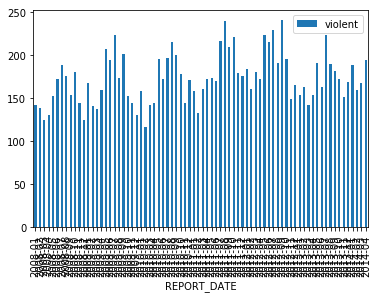

In [83]:
seattle_monthly_df.reset_index().plot.bar(x='REPORT_DATE', y='violent')

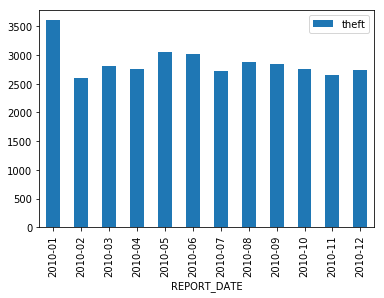

In [96]:
seattle_monthly_df.reset_index()[
    seattle_monthly_df.reset_index()['REPORT_DATE'].isin(
        [
            x
            for x in seattle_monthly_df.reset_index()['REPORT_DATE']
            if "2010" in str(x)
        ]
    )
].plot.bar(x='REPORT_DATE', y='theft')

In [107]:
# Median amount of crimes per month
monthly_crime = []
for month in range(1, 13):
    reset_index_df = seattle_monthly_df.reset_index()
    crime = [
        x[0] + x[1]
        for x in reset_index_df[
            reset_index_df['REPORT_DATE'].isin(
                [
                    x
                    for x in reset_index_df['REPORT_DATE']
                    if str(month) in x
                ]
            )
        ].drop(axis=1,columns=['REPORT_DATE']).values
    ]
    monthly_crime.append(np.median(crime))
    print(month, monthly_crime[-1])

1 2945.0
2 2972.5
3 2945.0
4 2856.5
5 3075.0
6 3026.0
7 2971.0
8 3073.0
9 3139.0
10 3034.0
11 2979.0
12 2868.0


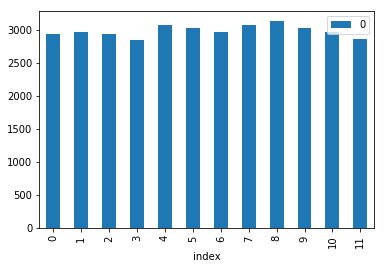

In [110]:
# Graph of median amount of crimes per month
pd.DataFrame(monthly_crime).reset_index().plot.bar(x='index', y=0)

In [100]:
# Median amount of violent crimes per month
monthly_violence = []
for month in range(1, 13):
    monthly_violence.append(np.median(seattle_monthly_df.reset_index()[
        seattle_monthly_df.reset_index()['REPORT_DATE'].isin(
            [
                x
                for x in seattle_monthly_df.reset_index()['REPORT_DATE']
                if str(month) in x
            ]
        )
    ]['violent']))
    print(month, monthly_violence[-1])

1 172.0
2 172.0
3 163.0
4 164.0
5 193.5
6 172.0
7 220.5
8 172.0
9 173.0
10 172.0
11 170.0
12 176.0


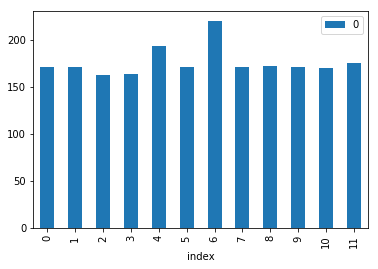

In [111]:
# Graph of median amount of violent crimes per month
pd.DataFrame(monthly_violence).reset_index().plot.bar(x='index', y=0)

In [101]:
# Median amount of theft-related crimes per month
monthly_theft = []
for month in range(1, 13):
    monthly_theft.append(np.median(seattle_monthly_df.reset_index()[
        seattle_monthly_df.reset_index()['REPORT_DATE'].isin(
            [
                x
                for x in seattle_monthly_df.reset_index()['REPORT_DATE']
                if str(month) in x
            ]
        )
    ]['theft']))
    print(month, monthly_theft[-1])

1 2761.5
2 2792.0
3 2763.5
4 2719.5
5 2903.0
6 2855.0
7 2764.0
8 2901.0
9 2945.0
10 2834.0
11 2804.0
12 2689.0


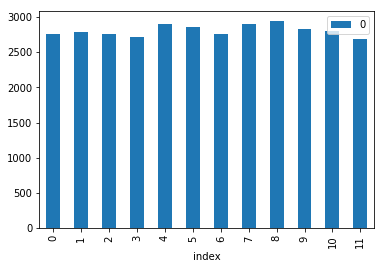

In [112]:
# Graph of median amount of theft-related crimes per month
pd.DataFrame(monthly_theft).reset_index().plot.bar(x='index', y=0)